In [1]:
import torch
import numpy as np

from torch import optim
from torch import nn
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

In [2]:
train_dataset = torchvision.datasets.CIFAR100(root='data/',
                                             train=True,  
                                             transform=transforms.ToTensor(), 
                                             download=True)


image, label = train_dataset[0]
print (image.size())
print (label)

Files already downloaded and verified
torch.Size([3, 32, 32])
19


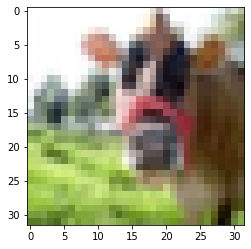

In [3]:
plt.imshow(image.permute(1, 2, 0).numpy())

In [4]:
train_loader = torch.utils.data.DataLoader(dataset=train_dataset,
                                           batch_size=64, 
                                           shuffle=True)

In [5]:
test_dataset = torchvision.datasets.CIFAR100(root='./data', train=False,
                                       download=True, transform=transforms.ToTensor())
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=4,
                                         shuffle=False)

Files already downloaded and verified


In [6]:
for X, y in test_loader:
    print("Shape of X [N, C, H, W]: ", X.shape)
    print("Shape of y: ", y.shape, y.dtype)
    break

Shape of X [N, C, H, W]:  torch.Size([4, 3, 32, 32])
Shape of y:  torch.Size([4]) torch.int64


In [7]:
classes = train_loader.dataset.classes

In [8]:
len(classes)

100

In [9]:
x = 1
max(0.1*x, 0.5*x)

0.5

In [10]:
32 * 32 * 2 /2 / 2 / 2 / 2

128.0

In [11]:
import torch.nn.functional as F

device = "cuda" if torch.cuda.is_available() else "cpu"
print("Using {} device".format(device))
DROPOUT_RATE = 0,5

class Net(nn.Module):
    def __init__(self, input_channels, hidden_dim, output_channels):
        super().__init__()
        self.flatten = nn.Flatten()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(input_channels, hidden_dim),
            nn.ReLU(),
            nn.Linear(hidden_dim, hidden_dim),
            nn.ReLU(),
        )
        self.final_linear = nn.Linear(hidden_dim, output_channels)


    def forward(self, x):
        x = self.flatten(x)
        x = self.linear_relu_stack(x)
        x = self.final_linear(x)
        return x


net = Net(3*32*32, 512, 100).to(device)

Using cuda device


In [12]:

print(net)

Net(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=3072, out_features=512, bias=True)
    (1): ReLU()
    (2): Linear(in_features=512, out_features=512, bias=True)
    (3): ReLU()
  )
  (final_linear): Linear(in_features=512, out_features=100, bias=True)
)


NameError: ignored

In [14]:
from tqdm import tqdm

In [7]:
def train(dataloader, model, loss_fn, optimizer):
    size = len(dataloader.dataset)
    model.train()
    for batch, (X, y) in enumerate(dataloader):
        X, y = X.to(device), y.to(device)

        # Compute prediction error
        pred = model(X)
        loss = loss_fn(pred, y)

        # Backpropagation
        optimizer.zero_grad()

        # pred = model(X)
        # loss = loss_fn(pred, y)

        loss.backward()
        optimizer.step()

        if batch % 100 == 0:
            loss, current = loss.item(), batch * len(X)
            print(f"loss: {loss:>7f}  [{current:>5d}/{size:>5d}]")


In [8]:
def test(dataloader, model, loss_fn):
    size = len(dataloader.dataset)
    num_batches = len(dataloader)
    model.eval()
    test_loss, correct = 0, 0
    with torch.no_grad():
        for X, y in dataloader:
            X, y = X.to(device), y.to(device)
            pred = model(X)
            test_loss += loss_fn(pred, y).item()
            correct += (pred.argmax(1) == y).type(torch.float).sum().item()
    test_loss /= num_batches
    correct /= size
    print(f"Test Error: \n Accuracy: {(100*correct):>0.1f}%, Avg loss: {test_loss:>8f} \n")

In [205]:
epochs = 10000
for t in range(epochs):
    print(f"Epoch {t+1}\n-------------------------------")
    train(train_loader, net, loss_fn, optimizer)
    test(test_loader, net, loss_fn)
print("Done!")

Epoch 1
-------------------------------
loss: 2.863658  [    0/50000]
loss: 2.997406  [ 6400/50000]
loss: 3.540434  [12800/50000]
loss: 3.062078  [19200/50000]
loss: 3.055332  [25600/50000]
loss: 3.095087  [32000/50000]
loss: 2.971152  [38400/50000]
loss: 3.200524  [44800/50000]
Test Error: 
 Accuracy: 23.2%, Avg loss: 3.256983 

Epoch 2
-------------------------------
loss: 3.148627  [    0/50000]
loss: 2.770233  [ 6400/50000]
loss: 2.991114  [12800/50000]
loss: 2.942281  [19200/50000]
loss: 3.223919  [25600/50000]
loss: 3.290008  [32000/50000]
loss: 2.757535  [38400/50000]
loss: 3.161375  [44800/50000]
Test Error: 
 Accuracy: 23.3%, Avg loss: 3.236166 

Epoch 3
-------------------------------
loss: 2.812153  [    0/50000]
loss: 2.832550  [ 6400/50000]
loss: 2.874180  [12800/50000]
loss: 2.764194  [19200/50000]
loss: 2.878758  [25600/50000]
loss: 3.104183  [32000/50000]
loss: 3.370643  [38400/50000]
loss: 3.043838  [44800/50000]
Test Error: 
 Accuracy: 23.1%, Avg loss: 3.239381 

Epoc

KeyboardInterrupt: ignored

In [208]:
# Для данной сети видимо 29%  это предел.

In [9]:
import torch.nn.functional as F

class resblock(nn.Module):
    def __init__(self, ch_in, ch_out, stride):
        super(resblock, self).__init__()
        self.conv_1 = nn.Conv2d(ch_in, ch_out, kernel_size=3, stride=stride, padding=1)
        self.bn_1 = nn.BatchNorm2d(ch_out)
        self.conv_2 = nn.Conv2d(ch_out, ch_out, kernel_size=3, stride=1, padding=1)
        self.bn_2 = nn.BatchNorm2d(ch_out)
        self.ch_in, self.ch_out, self.stride = ch_in, ch_out, stride
        self.ch_trans = nn.Sequential()

        if ch_in != ch_out:
            self.ch_trans = nn.Sequential(
                nn.Conv2d(ch_in, ch_out, kernel_size=1, stride=stride)
            )
        
    def forward(self, x):
        x_pro = F.relu(self.bn_1(self.conv_1(x)))
        x_pro = self.bn_2(self.conv_2(x_pro))

        x_ch = self.ch_trans(x)
        out = x_pro + x_ch

        return out

In [10]:
class resnet(nn.Module):
    def __init__(self):
        super(resnet, self).__init__()
        self.conv_1 = nn.Sequential(
          nn.Conv2d(3, 64, kernel_size=3, stride=1, padding=1),
          nn.BatchNorm2d(64)


        )
        self.block1 = resblock(64, 128, 2)
        self.block2 = resblock(128, 256, 2)
        self.block3 = resblock(256, 512, 1)  
        self.block4 = resblock(512, 512, 1)
        self.outlayer = nn.Linear(512, 100)

    def forward(self, x):
        x = x.view(-1, 3, 32, 32)
        x = F.relu(self.conv_1(x))
        x = self.block1(x)
        x = self.block2(x)
        x = self.block3(x)  
        x = self.block4(x)
        x = F.adaptive_avg_pool2d(x, [1,1])
        x = x.reshape(x.size(0), -1)
        result = self.outlayer(x)

        return result

In [11]:
device = torch.device('cuda')

In [12]:
net = resnet()

In [13]:
net = net.to(device)

In [119]:
# RuntimeError: CUDA error: device-side assert triggered
# CUDA kernel errors might be asynchronously reported at some other API call,so the stacktrace below might be incorrect.
# For debugging consider passing CUDA_ LAUNCH_ BLOCKING=1.
# Поймал тут такую ошибку

In [87]:
image, label = train_dataset[0]
image.shape

torch.Size([3, 32, 32])

In [88]:
image = image.view(-1, 3, 32, 32)

In [89]:
conv_1 = nn.Sequential(
          nn.Conv2d(3, 64, kernel_size=3, stride=1, padding=1),
          nn.BatchNorm2d(64)


        )

In [90]:
x = conv_1(image)

In [91]:
x.shape

torch.Size([1, 64, 32, 32])

In [92]:
block1 = resblock(64, 128, 2)

In [93]:
x = block1(x)

In [94]:
x.shape

torch.Size([1, 128, 16, 16])

In [95]:
block2 = resblock(128, 256, 2)

In [96]:
x = block2(x)

In [97]:
x.shape

torch.Size([1, 256, 8, 8])

In [98]:
block3 = resblock(256, 512, 1) 

In [99]:
x = block3(x)

In [100]:
x.shape

torch.Size([1, 512, 8, 8])

In [101]:
block4 = resblock(512, 512, 1)

In [102]:
x = block4(x)

In [103]:
x.shape

torch.Size([1, 512, 8, 8])

In [104]:
x = F.adaptive_avg_pool2d(x, [1,1])

In [105]:
x.shape

torch.Size([1, 512, 1, 1])

In [86]:
x.size

1

In [111]:
x = x.reshape(x.size(0), -1)

In [116]:
outlayer = nn.Linear(512, 100)

In [117]:
x = outlayer(x)

In [118]:
x.shape

torch.Size([1, 100])

In [14]:
loss_fn = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=1e-3, momentum=0.9)

In [15]:
epochs = 100
for t in range(epochs):
    print(f"Epoch {t+1}\n-------------------------------")
    train(train_loader, net, loss_fn, optimizer)
    test(test_loader, net, loss_fn)
print("Done!")

Epoch 1
-------------------------------
loss: 4.679064  [    0/50000]
loss: 3.915469  [ 6400/50000]
loss: 3.928963  [12800/50000]
loss: 3.405168  [19200/50000]
loss: 3.419940  [25600/50000]
loss: 3.479933  [32000/50000]
loss: 3.294418  [38400/50000]
loss: 3.168612  [44800/50000]
Test Error: 
 Accuracy: 17.2%, Avg loss: 3.615731 

Epoch 2
-------------------------------
loss: 3.000235  [    0/50000]
loss: 2.885749  [ 6400/50000]
loss: 2.850346  [12800/50000]
loss: 2.708573  [19200/50000]
loss: 2.651639  [25600/50000]
loss: 2.850076  [32000/50000]
loss: 2.692066  [38400/50000]
loss: 2.785685  [44800/50000]
Test Error: 
 Accuracy: 26.3%, Avg loss: 2.990624 

Epoch 3
-------------------------------
loss: 2.639330  [    0/50000]
loss: 2.849676  [ 6400/50000]
loss: 2.180912  [12800/50000]
loss: 2.807862  [19200/50000]
loss: 2.316794  [25600/50000]
loss: 2.493722  [32000/50000]
loss: 2.153420  [38400/50000]
loss: 2.760375  [44800/50000]
Test Error: 
 Accuracy: 37.9%, Avg loss: 2.384634 

Epoc